# Dimensionality Reduction

# Tools and Libraries:

* Python: Programming language for implementing algorithms and data manipulation.
* scikit-learn: Machine learning library for PCA and t-SNE.
* matplotlib and seaborn: Libraries for visualizing the results.
* pandas: Library for data manipulation and analysis.
* NumPy: Library for numerical operations.

In [68]:
## import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer

In [57]:
results = pd.read_csv('Data/results.csv')
mergedPitStops = pd.read_csv('Data/mergedPitStops.csv')

In [58]:
data = pd.merge(mergedPitStops,results[['driverId', 'position']], left_on = 'driverId', right_index = True, how = 'left')

/var/folders/j9/cbm31jzn08z95c3hz67rzjyc0000gn/T/ipykernel_47670/367688774.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'driverId_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = pd.merge(mergedPitStops,results[['driverId', 'position']], left_on = 'driverId', right_index = True, how = 'left')


In [59]:
column_to_move = data.pop('position')
data.insert(2, 'position', column_to_move)
data = data.replace('\\N', pd.NA)
data = data.dropna()

# Dimensionality Reduction Tab

Data was loaded, preprocessed, and standardized to ensure it was suitable for dimensionality reduction techniques.

In [60]:
# Selecting numeric columns and dropping any NA values
numeric_data = data.select_dtypes(include = [np.number]).dropna()

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Applying PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio for determining the optimal number of components
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_ratio.cumsum()  # Cumulative sum of variance explained with [n] components

array([0.25851058, 0.40497357, 0.53452351, 0.64114358, 0.7252219 ,
       0.79149666, 0.85135655, 0.90789507, 0.94817644, 0.97581803,
       0.99995159, 0.99998466, 0.99999509, 1.        , 1.        ])

* The first component explains about 26% of the variance.
* The first two components explain about 40%.
* The first three components explain about 53%.
* To capture around 70% of the variance, we need the first five components.

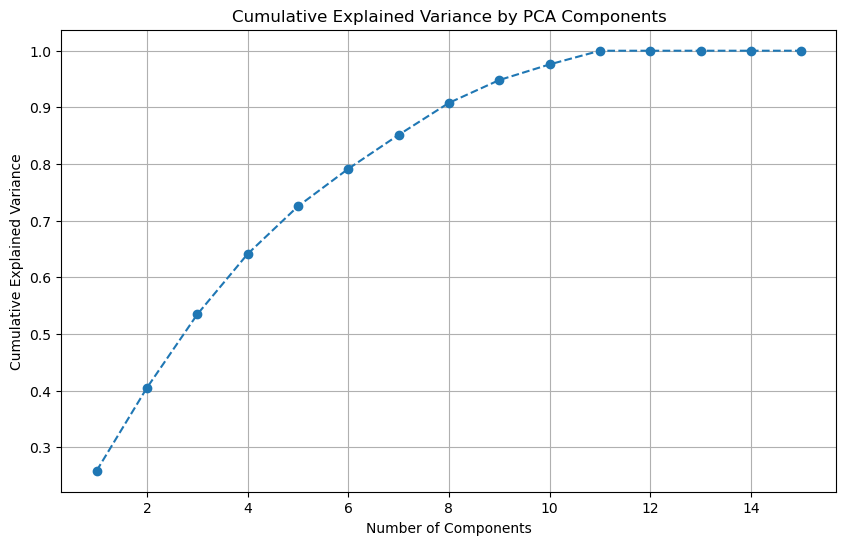

In [50]:
# Plotting the cumulative explained variance
plt.figure(figsize = (10, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker = 'o', linestyle = '--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

The plot of the cumulative explained variance by PCA components for the filled numeric data confirms that around 5 components capture approximately 70% of the variance. This suggests that reducing the dimensionality to 5 components would maintain most of the significant information while simplifying the dataset.

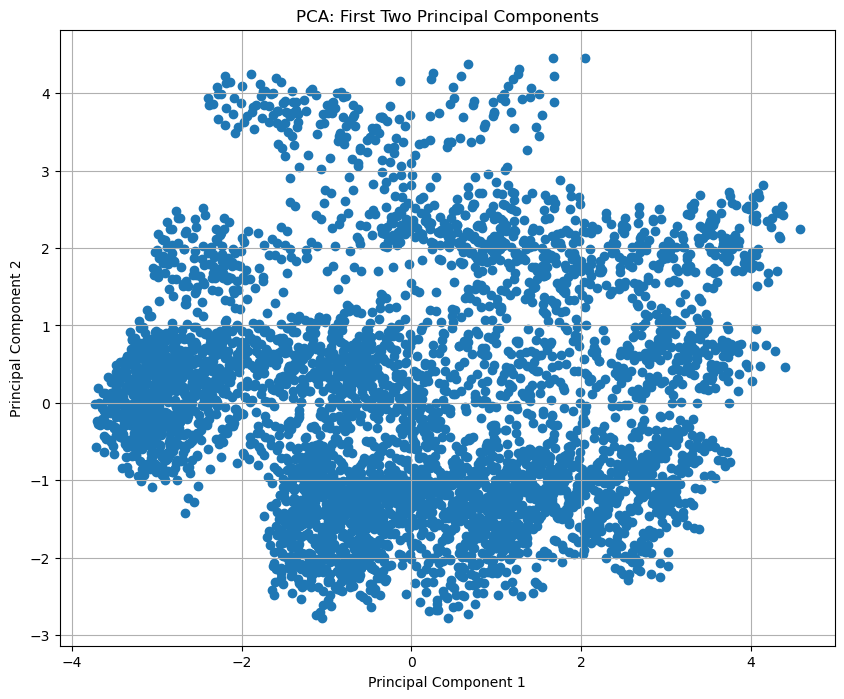

In [51]:
# Selecting the first two principal components for visualization
pca_2d = PCA(n_components=2)
reduced_data_2d = pca_2d.fit_transform(scaled_data)

# Plotting the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data_2d[:, 0], reduced_data_2d[:, 1])
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


There is a denser region in the center of the plot, which may suggest that most data points share commonality in the features that contribute most heavily to these two principal components.

The lack of visible clusters could mean that the data does not naturally group into distinct categories based on the features used, or it could indicate that the principal components chosen do not capture the axes along which any potential clusters might form.

There are some points that lie far from the central mass of points. These could be outliers and might warrant further investigation.

Given the lack of clear patterns, it might be necessary to look at more than two dimensions, as sometimes three or more components are needed to reveal the structure of the data. Alternatively, considering non-linear dimensionality reduction techniques like t-SNE or UMAP might provide more insight, especially if the data has non-linear relationships that PCA cannot capture.

In summary, while the plot may not provide clear groupings or patterns, it's an indication to investigate further with different techniques, better feature selection, or more components. It's also a reminder to consider domain expertise in interpreting the data.

# t-SNE

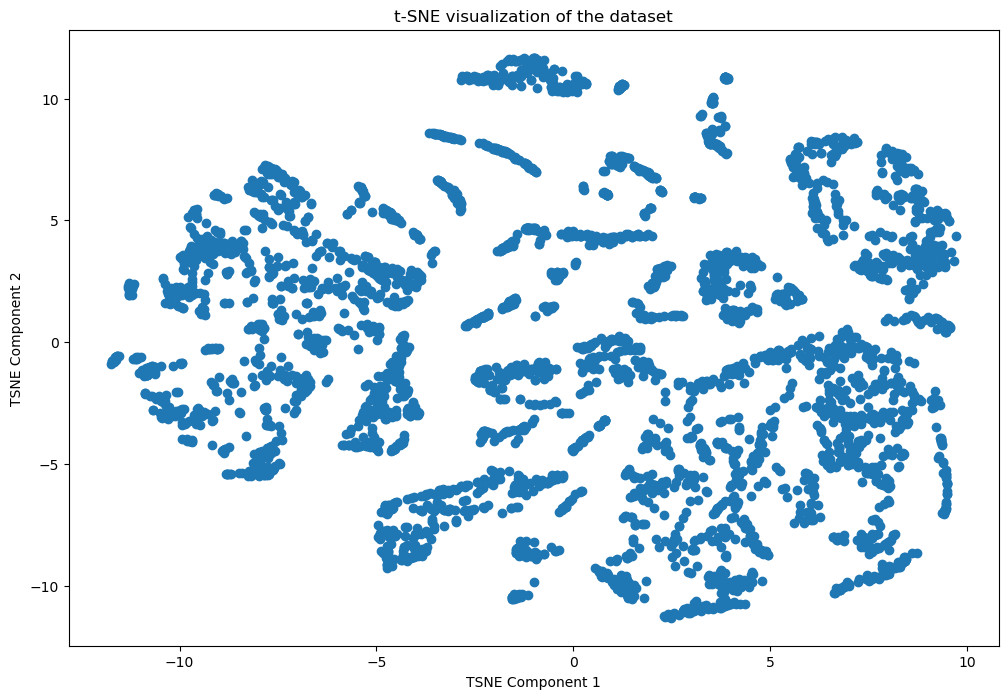

In [66]:
# Applying t-SNE
tsne = TSNE(n_components = 2, perplexity = 35, n_iter = 300)
tsne_results = tsne.fit_transform(scaled_data)

# Visualization
plt.figure(figsize=(12,8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('t-SNE visualization of the dataset')
plt.show()


The plot shows several clusters of points. These clusters suggest groupings or similarities in the high-dimensional space. Points that are close to each other are likely to be more similar (according to the original features), while points that are further apart are less similar.

The density of points within each cluster can give some indication of the distribution of data points within that region of the high-dimensional space. Dense clusters might represent common states or typical values, while sparser areas might represent more unusual or rare data points.

Any points that are far away from others could be considered outliers. They do not seem to group well with other data points, suggesting they are quite distinct from the rest of the data in the high-dimensional space.

## Try with different perplexity

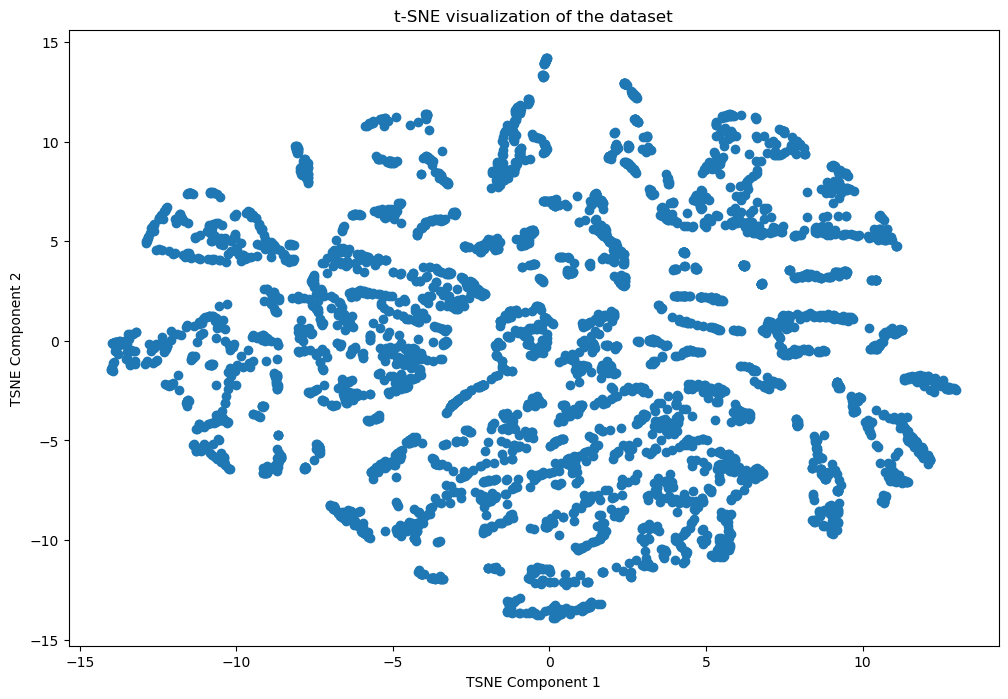

In [67]:
# Applying t-SNE
tsne1 = TSNE(n_components = 2, perplexity = 15, n_iter = 300)
tsne_results1 = tsne1.fit_transform(scaled_data)

# Visualization
plt.figure(figsize = (12,8))
plt.scatter(tsne_results1[:, 0], tsne_results1[:, 1])
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('t-SNE visualization of the dataset')
plt.show()

At a lower perplexity, t-SNE tends to focus on local structure, which could mean that clusters appear more compact or dense if the local groupings in the high-dimensional space are strong.

Lower perplexity might also lead to less overlap between clusters, as the algorithm pays more attention to the local neighbors of each point. However, if the perplexity is too low, t-SNE might start to fragment clusters that actually belong together, leading to a representation with many small, separate clusters that do not necessarily reflect meaningful groupings.

# Comparison

Structural Differences: PCA maintains the global structure and is good for understanding the overall variance in the data. t-SNE, however, reveals local structures and can sometimes separate clusters that are not distinct in PCA.

Cluster Formation: t-SNE may show distinct clusters where PCA does not. This is because t-SNE can capture non-linear relationships that PCA might miss.

Interpretability: PCA components have a direct interpretation as the directions of maximum variance, which can sometimes be tied back to the original features. t-SNE does not offer such interpretations; its axes have no inherent meaning in the original data space.

Dimensionality Representation: The PCA cumulative variance plot indicates that a linear reduction retains much of the data's variance with relatively few components, whereas t-SNE does not provide information about the variance and is purely focused on the local relationships.

In conclusion, if your goal is to reduce dimensionality while retaining as much variance as possible, PCA is appropriate. However, if you're interested in identifying clusters and local group patterns, particularly if you suspect non-linear relationships within the data, t-SNE might reveal more insights. It's not uncommon to use PCA for initial dimensionality reduction followed by t-SNE for visualization and exploration of clusters.